<a href="https://colab.research.google.com/github/Amitgm/Image_Classification_traffic_Signs/blob/main/Image_Classification_With_Traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

replace FullIJCNN2013/00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
images = glob.glob("*/*/*.ppm", recursive=True)

In [ ]:
images[8]

'FullIJCNN2013/20/00000.ppm'

In [ ]:
images[8].split("/")[2].split(".")[0]

'00000'

In [ ]:
# YOUR CODE HERE
def convert_ppm_to_png():
  for img in images:

      test_from_img = img.split("/")[1]
      image_name = img.split("/")[2].split(".")[0]

      if not os.path.exists("images_in_png/{}".format(test_from_img)):

          os.makedirs("images_in_png/{}".format(test_from_img))

      img = Image.open(img)
      img = img.resize((30, 30))

      img.save("images_in_png/{}/{}.png".format(test_from_img,image_name))


In [ ]:
convert_ppm_to_png()

#### Reading the png images

In [ ]:
images_png = glob.glob("images_in_png/*/*.png", recursive=True)

#### Creating array and labels for png images

In [ ]:
arrays = []
labels = []
for path in images_png:
    img = Image.open(path)
    img_array = np.array(img)
    label = path.split("/")[1]
    labels.append(int(label))
    arrays.append(img_array)

In [ ]:
labels

[20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

#### Getting all the first images from each sub folder

In [ ]:
# YOUR CODE HERE

main_dir = "images_in_png"

# Get all subfolders (class names)
class_folders = [f for f in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, f))]

# Dictionary to store one sample image per folder
sample_images = {}

for class_name in class_folders:
    class_path = os.path.join(main_dir, class_name)

    # Get all image files inside the class folder (modify extension if needed)
    image_files = glob.glob(os.path.join(class_path, "*.png"))

    if image_files:  # Ensure there are images
        sample_images[class_name] = image_files[0]  # Pick the first image

#### Plotting all the images in the dataset

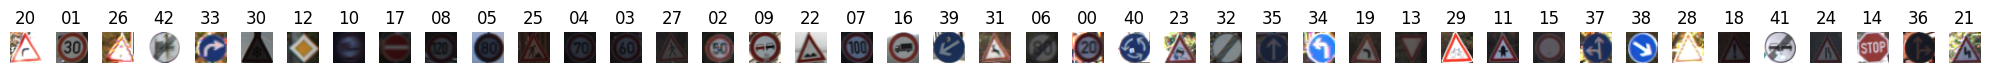

In [ ]:
num_classes = len(sample_images)
plt.figure(figsize=(20, 5))  # Adjust figure size dynamically

for i, (class_name, image_path) in enumerate(sample_images.items()):
    img = Image.open(image_path)  # Open image
    img_array = np.array(img)  # Convert to array

    plt.subplot(1, num_classes, i + 1)  # 1 row, `num_classes` columns
    plt.imshow(img_array)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

#### Plot the distribution of Classes

In [ ]:
# YOUR CODE HERE
main_dir = "images_in_png"
class_folders = [f for f in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, f))]

Class: 20, Length: 9
Class: 01, Length: 79
Class: 26, Length: 18
Class: 42, Length: 11
Class: 33, Length: 16
Class: 30, Length: 16
Class: 12, Length: 85
Class: 10, Length: 80
Class: 17, Length: 29
Class: 08, Length: 57
Class: 05, Length: 53
Class: 25, Length: 31
Class: 04, Length: 68
Class: 03, Length: 30
Class: 27, Length: 3
Class: 02, Length: 81
Class: 09, Length: 41
Class: 22, Length: 13
Class: 07, Length: 41
Class: 16, Length: 8
Class: 39, Length: 6
Class: 31, Length: 2
Class: 06, Length: 19
Class: 00, Length: 4
Class: 40, Length: 10
Class: 23, Length: 20
Class: 32, Length: 8
Class: 35, Length: 20
Class: 34, Length: 12
Class: 19, Length: 2
Class: 13, Length: 83
Class: 29, Length: 5
Class: 11, Length: 38
Class: 15, Length: 15
Class: 37, Length: 2
Class: 38, Length: 88
Class: 28, Length: 14
Class: 18, Length: 38
Class: 41, Length: 7
Class: 24, Length: 5
Class: 14, Length: 32
Class: 36, Length: 9
Class: 21, Length: 5


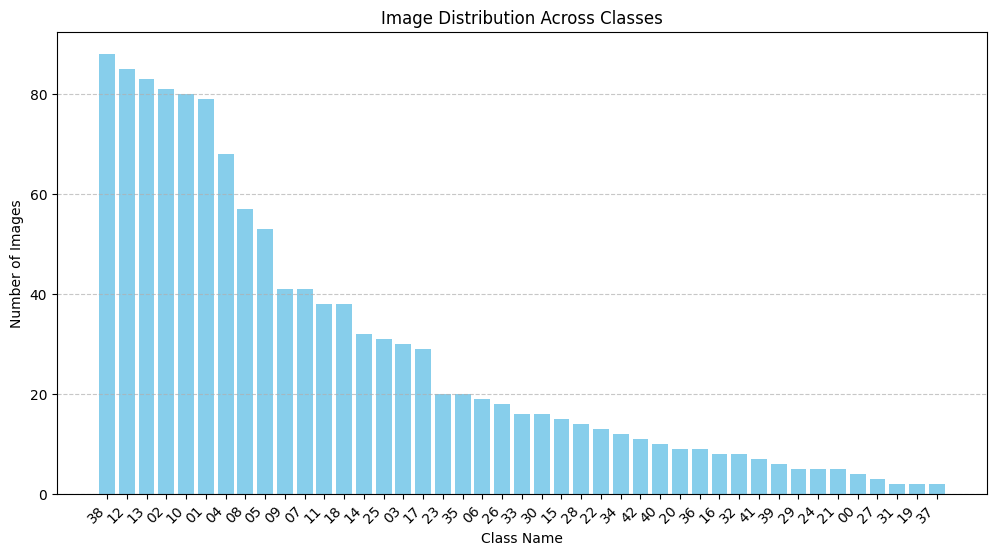

In [ ]:
class_counts = {}
for class_name in class_folders:

    class_length = len(os.listdir(os.path.join(main_dir, class_name)))
    print(f"Class: {class_name}, Length: {class_length}")

    class_counts[class_name] = class_length

# Sort by class name (optional)
class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')

plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Image Distribution Across Classes")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
# Reshape to 2D (900x3) for normalization
image_array = np.array(arrays)

In [ ]:
normalized_images = image_array / 255.0

In [ ]:
len(normalized_images)

1213

In [ ]:
len(labels)

1213

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels, test_size=0.2, random_state=42)

In [ ]:
X_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_flattened.shape

(970, 2700)

In [ ]:
X_test_flattened.shape

(243, 2700)

In [ ]:
y_train.shape,y_test.shape

((970,), (243,))

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
param_grid = {
    'batch_size': [20,50,45,30,25,10,15],
    'optimizer': ['adam', 'rmsprop'], # Pass optimizer directly to create_model
    'n_neurons': [128, 64, 32], # Experiment with different neuron counts
}

In [ ]:
def create_model(n_neurons=32, optimizer='adam', hidden_activation='relu'):
    model = Sequential([
        Dense(n_neurons, activation= hidden_activation, input_dim=X_flattened.shape[1]),
        Dense(64, activation=hidden_activation),  # Assuming 64 neurons in this layer
        Dense(32, activation=hidden_activation),
        Dense(43, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
!pip install scikit-learn==1.3.1

In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

ImportError: cannot import name '_get_container_adapter' from 'sklearn.utils._set_output' (/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py)

In [ ]:
model_new = KerasClassifier(
    model=create_model,
    optimizer='adam', # Provide default values here
    n_neurons=32,
    hidden_activation='relu',
    epochs=10,
    # batch_size=32,
    verbose=0
)

#### Training the model

In [ ]:
model = create_model()

In [ ]:
model.fit(X_flattened, y_train, epochs=10, batch_size=32)

#### Evaluating the model

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_flattened, y_test, verbose=1)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

#### Using the Grid search with hyperparametrs

In [ ]:
# print("scikit-learn version:", sklearn.__version__)
# print("scikeras version:", scikeras.__version__)
# print("TensorFlow version:", tf.__version__)

#### Defining the KerasClassifier

In [ ]:
gs= GridSearchCV(estimator=model_new,param_grid=param_grid,scoring='accuracy',cv=2,
                     n_jobs=-1,return_train_score=True,verbose=0)

In [ ]:
X_flattened.shape,y_train.shape

In [ ]:
grid_result = gs.fit(X_flattened, y_train)

In [ ]:
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

In [ ]:
X_test_flattened.shape

In [ ]:
y_test.shape

In [ ]:
# Predict on test data using the best model found by GridSearchCV
y_pred = gs.best_estimator_.predict(X_test_flattened)

# Print predictions
print("Predicted labels:", y_pred)

# Evaluate model performance
# test_loss, test_acc =
gs.best_estimator_.score(X_test_flattened, y_test)
# print(f"Test Loss: {test_loss:.4f}")
# print(f"Test Accuracy: {test_acc:.4f}")


#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
# YOUR CODE HERE
mlp = MLPClassifier(hidden_layer_sizes=(128,64,32),activation="relu",solver='adam', max_iter=200)
mlp.fit(X_flattened, y_train)
y_pred_mlp = mlp.predict(X_test_flattened)
mlp_acc = accuracy_score(y_test, y_pred_mlp)

print("MLP Classifier Accuracy:", mlp_acc)

In [ ]:
RandomForestClassifier?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_flattened, y_train)
y_pred_rf = rf.predict(X_test_flattened)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Random Forest Classifier Accuracy:", rf_acc)

In [ ]:
# 4. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X_flattened, y_train)
y_pred_lr = lr.predict(X_test_flattened)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_acc)

In [ ]:
XGBClassifier?

In [ ]:
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(n_estimators=100,max_depth=15,learning_rate=0.01)
    xgb.fit(X_flattened, y_train)
    y_pred_xgb = xgb.predict(X_test_flattened)
    xgb_acc = accuracy_score(y_test, y_pred_xgb)
    print("XGBoost Classifier Accuracy:", xgb_acc)
except ImportError:
    xgb_acc = None  # Skip XGBoost if not installed

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

In [ ]:
!pip -qq install livelossplot

In [ ]:
import livelossplot

In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=X_flattened.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))



In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

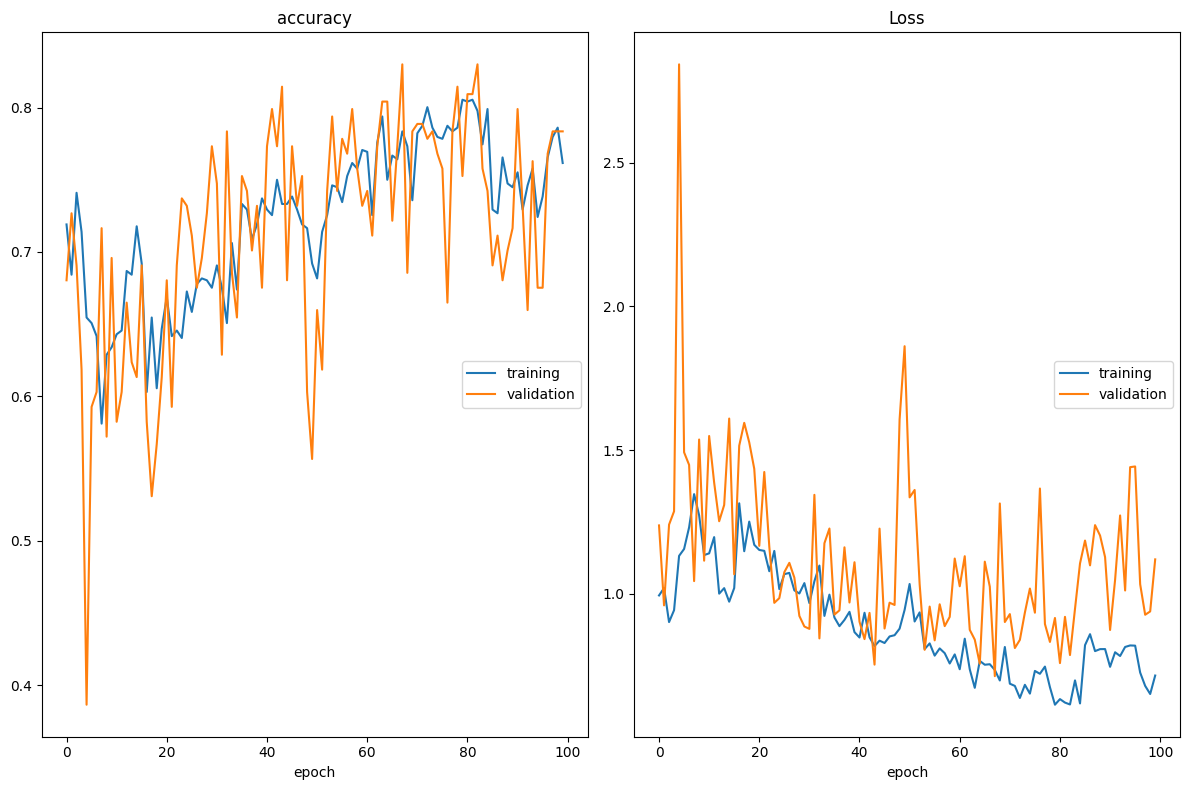

accuracy
	training         	 (min:    0.581, max:    0.805, cur:    0.762)
	validation       	 (min:    0.387, max:    0.830, cur:    0.784)
Loss
	training         	 (min:    0.615, max:    1.347, cur:    0.716)
	validation       	 (min:    0.714, max:    2.842, cur:    1.120)
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7690 - loss: 0.7035 - val_accuracy: 0.7835 - val_loss: 1.1204


In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
plot_losses = livelossplot.PlotLossesKeras()

model.fit(X_flattened, y_train, epochs=100, batch_size=24, verbose=1, validation_split=0.2,callbacks=[plot_losses])

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score
mlp = MLPClassifier(hidden_layer_sizes=(128,64,32),activation="relu",solver='adam', max_iter=200)
mlp.fit(X_flattened, y_train)
y_pred_mlp = mlp.predict(X_test_flattened)
mlp_acc = accuracy_score(y_test, y_pred_mlp)

print("MLP Classifier Accuracy:", mlp_acc)

MLP Classifier Accuracy: 0.8518518518518519


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Experiment using Dropout, Regularization and Batch Normalization

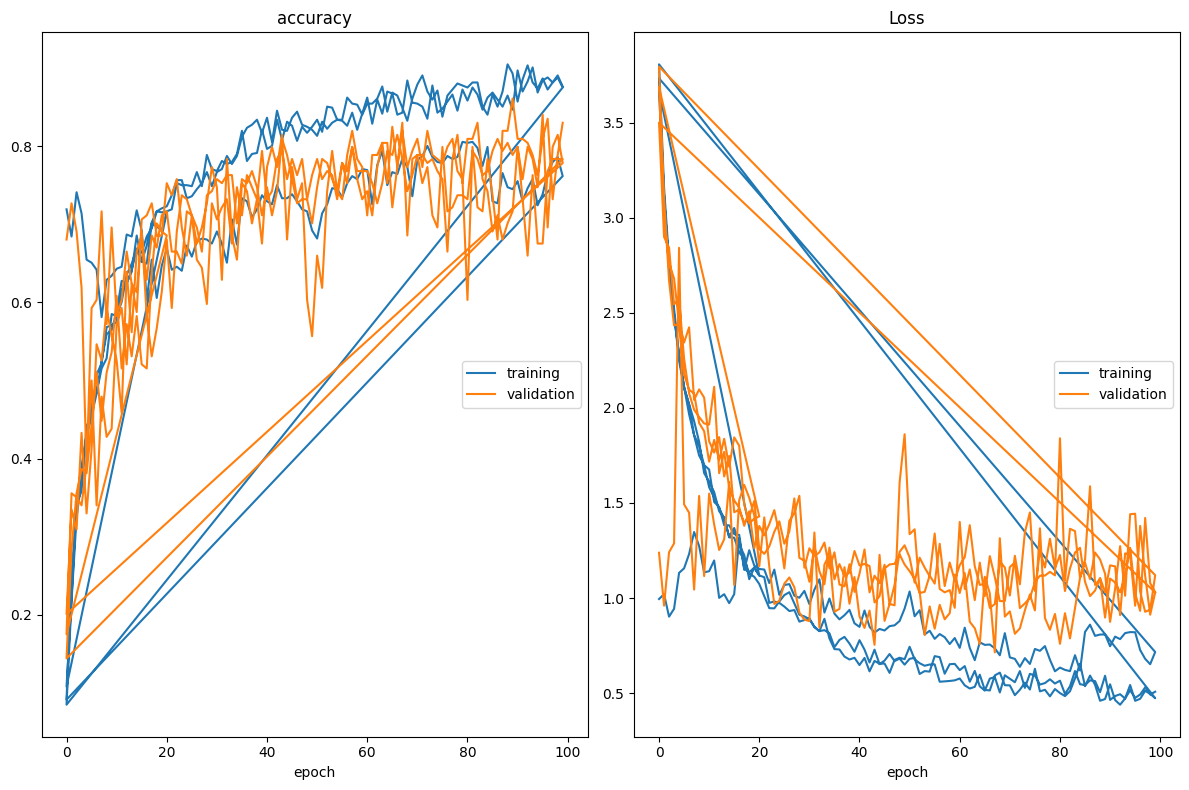

accuracy
	training         	 (min:    0.085, max:    0.905, cur:    0.876)
	validation       	 (min:    0.144, max:    0.861, cur:    0.830)
Loss
	training         	 (min:    0.439, max:    3.807, cur:    0.508)
	validation       	 (min:    0.714, max:    3.795, cur:    1.032)
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8761 - loss: 0.4835 - val_accuracy: 0.8299 - val_loss: 1.0315
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8304 - loss: 0.8485 
Keras Model Accuracy: [0.7706691026687622, 0.8395061492919922]


In [ ]:
# YOUR CODE HERE

from tensorflow.keras.regularizers import l2

# Build a Keras Model
def build_model():
    model = Sequential([
        Dense(128, kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.3),

        Dense(64, kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.3),

        Dense(43, activation="softmax")
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Train the Model
model = build_model()


history = model.fit(X_flattened, y_train, epochs=100, batch_size=24, verbose=1, validation_split=0.2,callbacks=[plot_losses])

# Evaluate
test_acc = model.evaluate(X_test_flattened, y_test)
print("Keras Model Accuracy:", test_acc)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
predictions = np.argmax(model.predict(X_test_flattened),axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
cm = confusion_matrix(y_test,predictions,labels=np.unique(y_train))

In [ ]:
disp.plot?

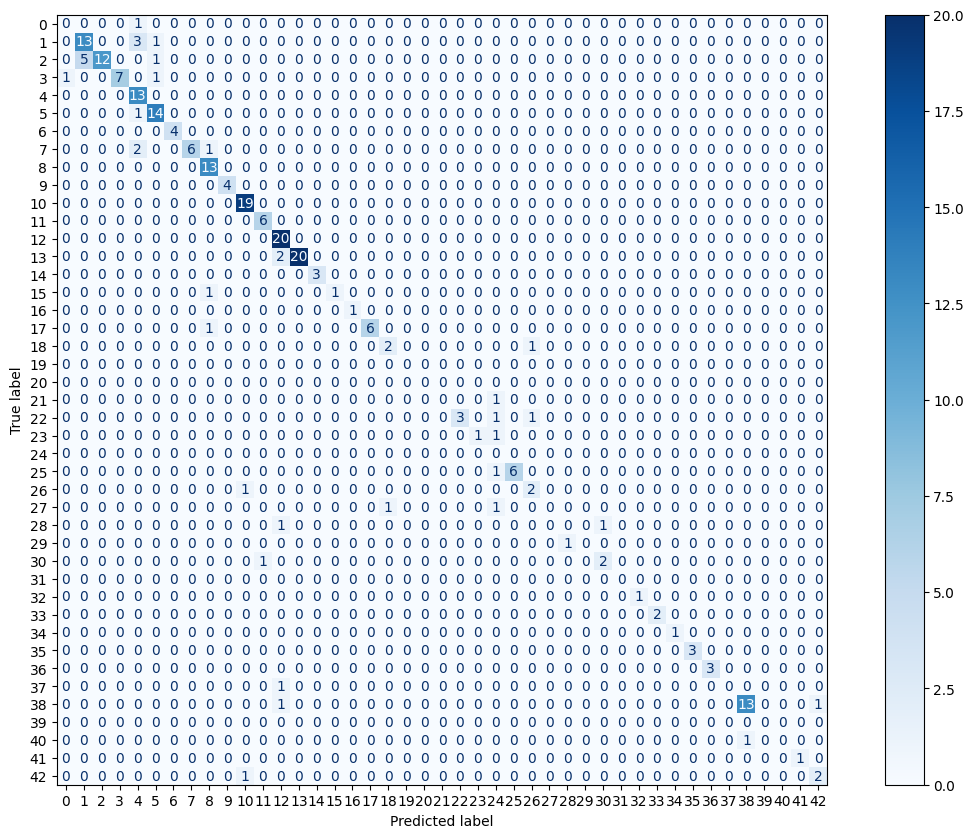

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_train))
fig, ax = plt.subplots(figsize=(15, 10))
disp.plot(cmap='Blues',ax=ax)  # You can change the colormap if needed


# Show the plot
plt.show()

In [ ]:
np.argmax(model.predict(X_test_flattened),axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([ 8,  6,  1, 12,  4,  0, 10,  2, 33, 42,  2, 33,  5,  5, 30,  8,  7,
       12,  8, 12,  8,  5, 10,  6, 10,  4, 24, 38,  1, 12, 25, 10, 12,  9,
       13,  8,  7, 38, 26,  8,  1, 35,  9, 17, 12, 11, 12, 25,  1, 12, 18,
       13,  4, 42, 13, 36,  5,  1, 42, 10, 12,  1, 13,  4,  3, 38,  2, 13,
       12, 10,  1,  1, 14,  1, 10, 15,  1,  5, 13, 17, 13, 38,  2, 26,  8,
       26, 17, 13, 36,  1,  5,  2, 10, 12,  8,  5, 10,  5, 38,  1, 30, 16,
       10,  4,  4,  4, 10,  7, 14,  2,  1, 12, 13, 38, 34,  3,  2, 10,  2,
        3,  5, 14,  5,  8,  5, 13, 24,  2,  2,  9,  4, 13,  7,  8, 10,  8,
        3, 13,  5, 10,  1,  5, 12, 12, 12, 10, 24, 38, 13,  5, 13, 11, 24,
       13,  6, 38, 13,  5,  3,  2,  4, 11, 22, 38, 17, 10, 12, 30, 13,  8,
        8, 38,  3, 38, 23, 25, 36, 12,  5, 41, 10,  6, 12, 11, 38, 12, 11,
        4, 38, 12, 28, 25, 35, 22,  4, 12, 22, 13, 24, 10,  5, 11,  7,  4,
        4, 26, 25, 35, 12,  1, 12, 13, 25,  4,  3, 17, 12, 13, 10,  1,  4,
        8,  4, 12, 17,  4

In [ ]:
y_test

array([ 8,  6,  1, 12,  4,  3, 10,  2, 33, 42,  2, 33,  3,  5, 30, 15,  7,
       12,  8, 12,  8,  2, 10,  6, 10,  4, 21, 40,  1, 12, 25, 10, 12,  9,
       13,  8,  7, 38, 22,  8,  1, 35,  9, 17, 28, 11, 12, 25,  1, 13, 27,
       13,  4, 42, 13, 36,  5,  1, 38, 10, 12,  1, 13,  4,  3, 38,  2, 13,
       13, 10,  2,  1, 14,  1, 42, 15,  1,  5, 13, 17, 13, 38,  2, 18,  8,
       26, 17, 13, 36,  2,  1,  2, 10, 12,  8,  5, 10,  5, 38,  1, 28, 16,
       10,  1,  1,  4, 10,  7, 14,  2,  2, 37, 13, 38, 34,  3,  2, 10,  2,
        3,  5, 14,  5,  8,  5, 13, 25,  2,  2,  9,  4, 13,  7,  8, 10,  8,
        3, 13,  5, 10,  2,  5, 12, 12, 12, 10, 27, 38, 13,  5, 13, 11, 22,
       13,  6, 38, 13,  5,  3,  2,  0, 30, 22, 38, 17, 10, 12, 30, 13,  7,
       17, 38,  3, 38, 23, 25, 36, 12,  5, 41, 10,  6, 12, 11, 38, 12, 11,
        4, 38, 12, 29, 25, 35, 22,  4, 12, 22, 13, 23, 10,  5, 11,  7,  4,
        7, 26, 25, 35, 12,  1, 12, 13, 25,  7,  3, 17, 12, 13, 26,  2,  4,
        8,  4, 38, 17,  5

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.